In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D, Conv2D, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import imutils


In [2]:
df = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
x = df.drop('0',axis = 1)
y = df['0']

In [5]:
#reshaping data in csv file so that it can be displayed as image
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x = np.reshape(train_x.values,(train_x.shape[0], 28, 28,))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


In [6]:
print("Train data shape  : " , train_x.shape)
print("Test data shape  : " , test_x.shape)


Train data shape  :  (297960, 28, 28)
Test data shape  :  (74490, 28, 28)


In [7]:
train_yOHE = to_categorical(train_y , num_classes = 26 , dtype = 'int')
print("New shape of train labels : " , train_yOHE.shape)

test_yOHE = to_categorical(test_y , num_classes = 26 , dtype = 'int')
print("New shape of test labels : " , test_yOHE.shape)

New shape of train labels :  (297960, 26)
New shape of test labels :  (74490, 26)


In [8]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

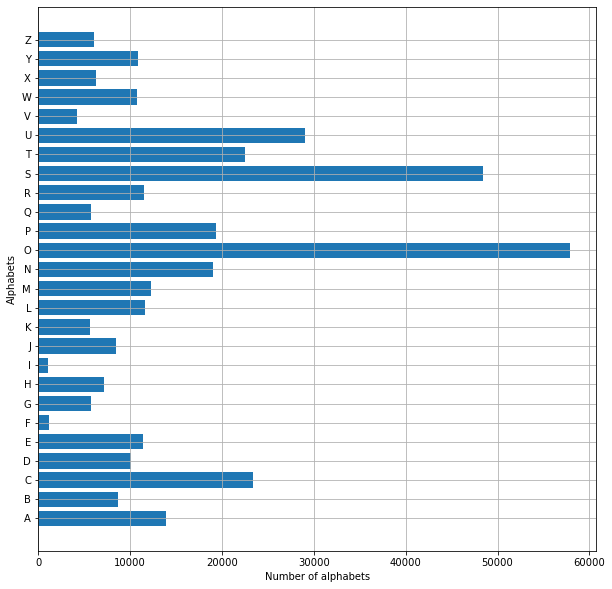

In [9]:
#plotting the no of alphabets  in the dataset
y_int = np.int0(y)
count = np.zeros(26, dtype = 'int')
for i in y_int : 
    count[i] += 1

alpha = []
for i in word_dict.values() :
    alpha.append(i)
    
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.barh(alpha,count)

plt.xlabel("Number of alphabets")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

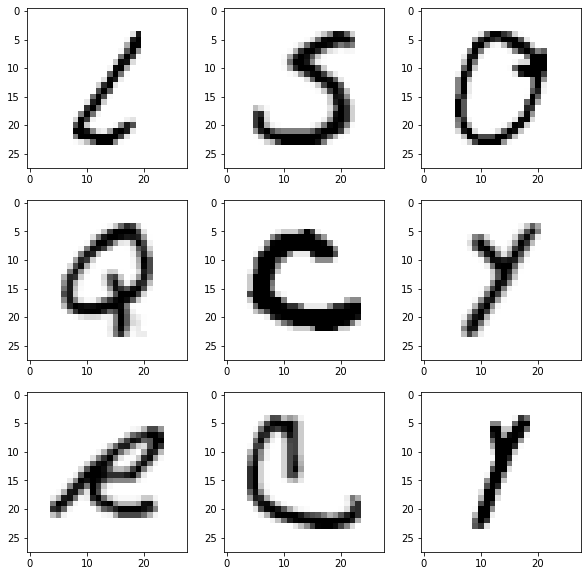

In [10]:
#shuffling data
shuff = shuffle(train_x[:100])

fig,ax = plt.subplots(3,3,figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i],30,200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i],(28,28)), cmap ="Greys")
plt.show()

In [11]:
#data reshaping, reshaping the training and testing dataset so that it can be put in  model
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2], 1)
print("New shape of train data : " , train_x.shape)

test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)
print("New shape of test data : ", test_x.shape)


New shape of train data :  (297960, 28, 28, 1)
New shape of test data :  (74490, 28, 28, 1)


In [12]:
train_yOHE = to_categorical(train_y , num_classes = 26 , dtype = 'int')
print("New shape of train labels : " , train_yOHE.shape)

test_yOHE = to_categorical(test_y , num_classes = 26 , dtype = 'int')
print("New shape of test labels : " , test_yOHE.shape)

New shape of train labels :  (297960, 26)
New shape of test labels :  (74490, 26)


In [13]:
#CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3),activation= 'relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))

model.add(Conv2D(filters=64, kernel_size = (3,3),activation= 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))

model.add(Conv2D(filters=128, kernel_size = (3,3),activation= 'relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(26, activation = "softmax"))

In [14]:
#Compiling and fitting model
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

history =  model.fit(train_x,train_yOHE,epochs = 5, validation_data = (test_x,test_yOHE))

Epoch 1/5
9312/9312 [==============================] - 210s 22ms/step - loss: 0.1651 - accuracy: 0.9559 - val_loss: 0.0870 - val_accuracy: 0.9762
Epoch 2/5
9312/9312 [==============================] - 215s 23ms/step - loss: 0.0733 - accuracy: 0.9794 - val_loss: 0.0742 - val_accuracy: 0.9797
Epoch 3/5
9312/9312 [==============================] - 218s 23ms/step - loss: 0.0619 - accuracy: 0.9833 - val_loss: 0.0629 - val_accuracy: 0.9834
Epoch 4/5
9312/9312 [==============================] - 194s 21ms/step - loss: 0.0566 - accuracy: 0.9848 - val_loss: 0.0635 - val_accuracy: 0.9836
Epoch 5/5
9312/9312 [==============================] - 164s 18ms/step - loss: 0.0543 - accuracy: 0.9855 - val_loss: 0.0555 - val_accuracy: 0.9856


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
#getting the train and validation accuracies and losses
print("The validation accuracy is  : ",history.history['val_accuracy'])
print("The training accuracy is : ",history.history['accuracy'])
print("The validation loss is : ",history.history['val_loss'])
print("The training loss is : ",history.history['loss'])

The validation accuracy is  :  [0.9762115478515625, 0.9797422289848328, 0.9833669066429138, 0.9835816621780396, 0.985622227191925]
The training accuracy is :  [0.9558967351913452, 0.9794200658798218, 0.9833232760429382, 0.98476642370224, 0.9854678511619568]
The validation loss is :  [0.08697719126939774, 0.07421933114528656, 0.062884621322155, 0.06354361027479172, 0.05553276091814041]
The training loss is :  [0.16509877145290375, 0.07333339005708694, 0.061859484761953354, 0.05660704895853996, 0.054306305944919586]


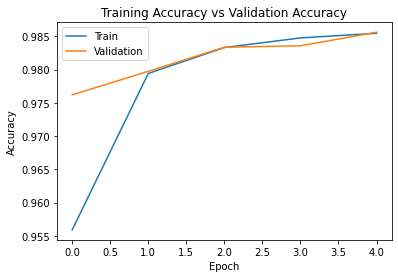

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

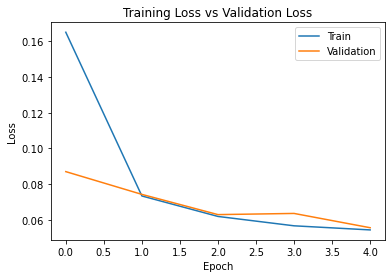

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

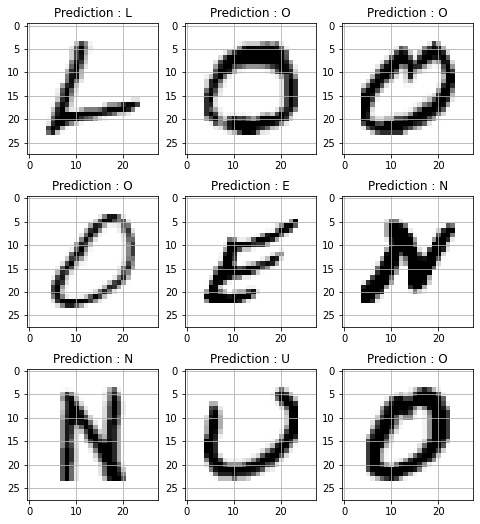

In [19]:
#SOME PREDICTIONS ON TEST DATA
fig,axes = plt.subplots(3,3,figsize = (8,9))
axes = axes.flatten()
for i , ax in enumerate(axes) : 
    img = np.reshape(test_x[i], (28,28))
    ax.imshow(img,cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction : " +pred)
    ax.grid()
    

In [32]:
img = cv2.imread(r'pic59.jpeg') #Given handwritten Character as input 
img_copy = img.copy()

img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (400,440))

In [33]:
img_copy = cv2.GaussianBlur(img_copy, (7,7) ,0)
img_gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray,100,255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final = np.reshape(img_final,(1,28,28,1))

In [34]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img , "Prediction is : " + img_pred,(20,395), cv2.FONT_HERSHEY_TRIPLEX , 0.8, color = (0,0,230))
cv2.imshow('Handwritten character recognition ', img)

1/1 [==============================] - 0s 19ms/step


In [35]:
while(1):
    k = cv2.waitKey(1) & 0xFF 
    if k == 27 : 
        break 
        
cv2.destroyAllWindows()

In [24]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [25]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (28, 28), interpolation = cv2.INTER_CUBIC)
        
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,28,28,1)
        ypred = word_dict[np.argmax(model.predict(thresh))]
        
        [x] = ypred
        letters.append(x)
    return letters, image

In [26]:
def get_word(letter):
    word = "".join(map(str,letter))
    
    return word

1/1 [==============================] - 0s 20ms/step
EMMA
['EMMA']


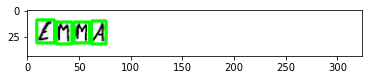

In [27]:
letter,image = get_letters(r"VALIDATION_0076.jpg") #Given handwritten text as input
word = get_word(letter)
print(word)
plt.imshow(image)
res = word.split()
print(res)

1/1 [==============================] - 0s 16ms/step
REBOULET
['REBOULET']


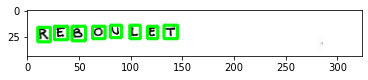

In [28]:
letter,image = get_letters(r"VALIDATION_0319.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
res = word.split()
print(res)

1/1 [==============================] - 0s 5ms/step
MAUPAS


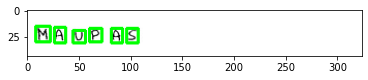

In [29]:
letter,image = get_letters(r"TRAIN_00040.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 20ms/step
LEGRANO


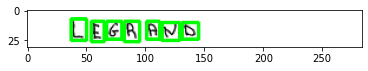

In [30]:
letter,image = get_letters(r"TRAIN_00176.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 14ms/step
CRUSSIERE


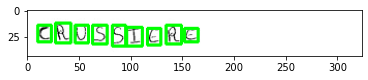

In [31]:
letter,image = get_letters(r"VALIDATION_0096.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)